In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('twitter_training.csv')

In [3]:
data

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
data.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
data.shape

(74682, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [8]:
data.dropna(inplace=True)

In [9]:
data.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
data=data[['Entity','Sentiment']]

In [11]:
sentiment_count=data['Sentiment'].value_counts()
sentiment_count

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64

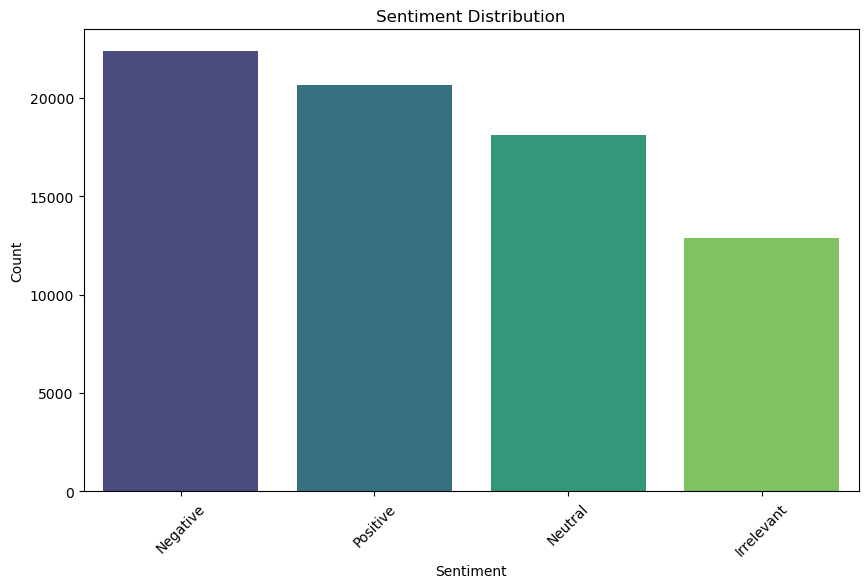

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_count.index,y=sentiment_count.values,palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
entity_sentiment=data.groupby(['Entity','Sentiment']).size().unstack(fill_value=0)

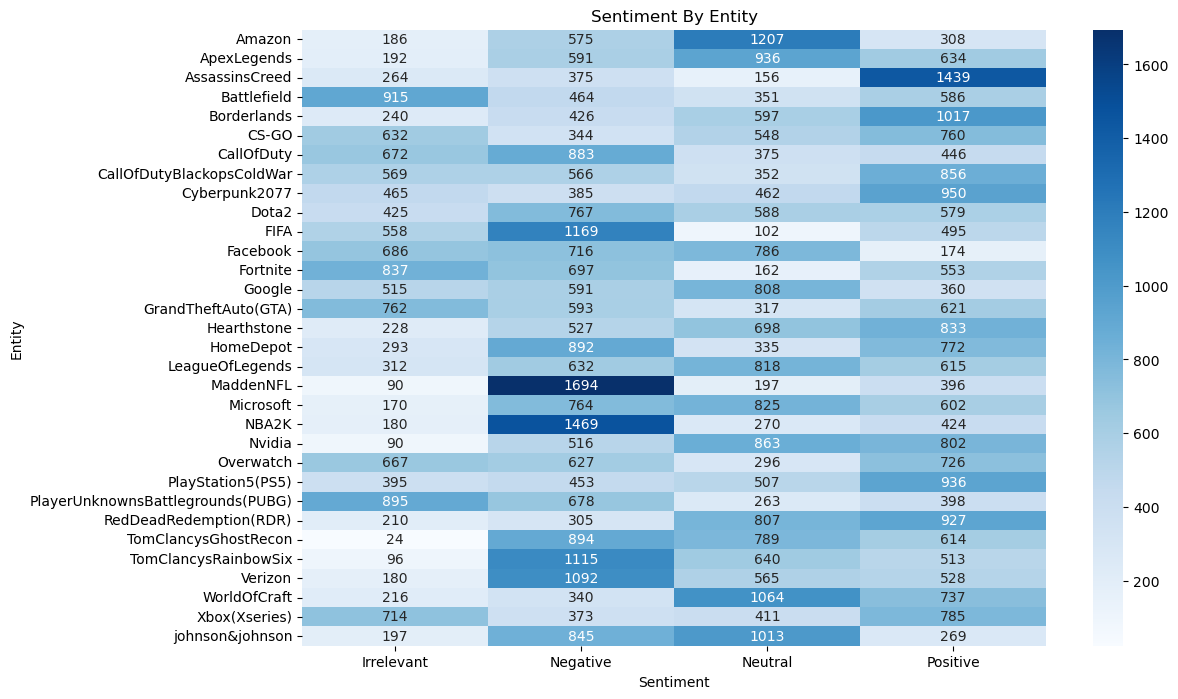

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(entity_sentiment,annot=True,fmt='d',cmap='Blues')
plt.title('Sentiment By Entity')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

In [15]:
brand_data=data[data['Entity'].str.contains('Amazon',case=False)]
Brand_sentiment=brand_data['Sentiment'].value_counts()
Brand_sentiment

Neutral       1207
Negative       575
Positive       308
Irrelevant     186
Name: Sentiment, dtype: int64

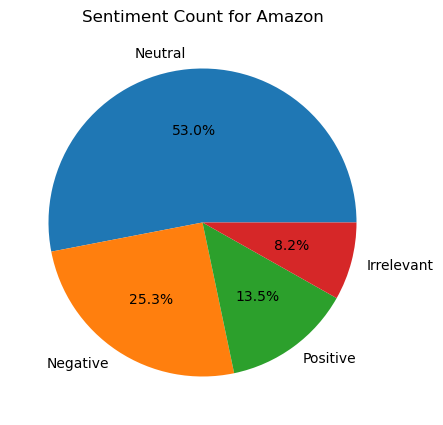

In [16]:
plt.figure(figsize=(5,5))
plt.pie(Brand_sentiment,labels=Brand_sentiment.index,autopct='%1.1f%%')
plt.title('Sentiment Count for Amazon')
plt.show()

In [17]:
brand_data=data[data['Entity'].str.contains('FIFA',case=False)]
Brand_sentiment=brand_data['Sentiment'].value_counts()
Brand_sentiment

Negative      1169
Irrelevant     558
Positive       495
Neutral        102
Name: Sentiment, dtype: int64

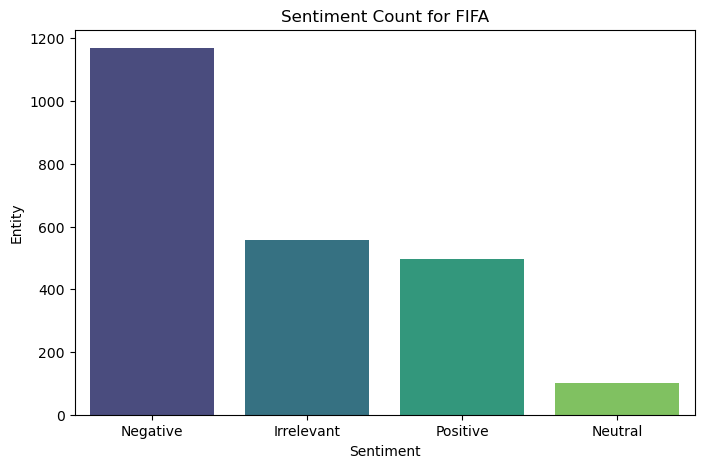

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=Brand_sentiment.index,y=Brand_sentiment.values,palette='viridis')
plt.title('Sentiment Count for FIFA')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()